Here deterministic strategies: Random, RandomInTree (by Vlad), RandomOuter, RandomInner
For ω_n (I ... I)_m define n == m for, where n is [2, 20]

# Import the dependencies

In [1]:
import sys
from tqdm import tqdm

sys.path.append("../")
from calculus_path_mod.term_engine import *
from calculus_path_mod.reduction_strategy import *

Lambda = Abstraction
App = Application

# Defining test term:
    ω_n (I ... I)_m

In [2]:
def i_term():
    x = Var()
    x_ = Atom(x)
    return Lambda(x, x_)


def omega_term(n: int):
    x = Var()
    x_ = Atom(x)
    body_app_term = x_
    for _ in range(n - 1):
        body_app_term = App(body_app_term, x_)
    return Lambda(x, body_app_term)


def multi_i_term(m: int):
    app_term = i_term()
    for _ in range(m - 1):
        app_term = App(app_term, i_term())
    return app_term


def omega_multi_i_term(n: int, m: int):
    return App(omega_term(n), multi_i_term(m))

# Drawing stuff

In [3]:
import matplotlib.pyplot as plt


def draw_mult_lines(
        comp_data: dict, title="title", x_label="x_label", y_label="y_label"
):
    for key in comp_data.keys():
        plt.plot(
            range(2, len(comp_data[key][0]) + 2), comp_data[key][0], comp_data[key][1], label=key
        )

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend(loc="upper right")
    plt.show()

# Run through strategies
### LeftOuter strategy

In [4]:
nm_pairs = [(x, x) for x in range(2, 30 + 2)]

In [5]:
lo_steps = []
strategy = LOStrategy()
for n, m in tqdm(nm_pairs):
    term = omega_multi_i_term(n, m)
    _, norm_steps = term.normalize(strategy, is_limited=False)
    lo_steps.append(norm_steps)

100%|██████████| 30/30 [01:46<00:00,  3.56s/it]


In [6]:
print(lo_steps)

[4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289, 324, 361, 400, 441, 484, 529, 576, 625, 676, 729, 784, 841, 900, 961]


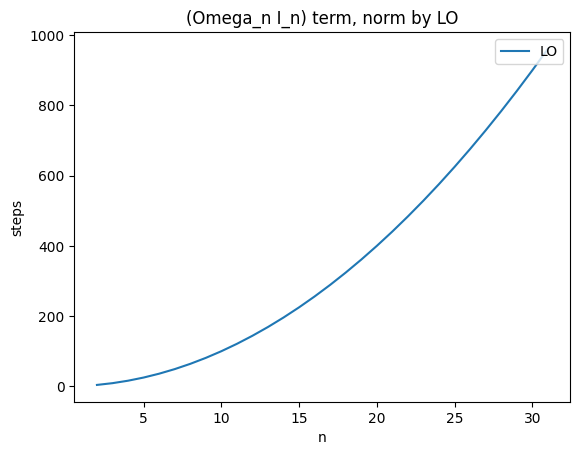

In [7]:
context = {
    "LO": (lo_steps, "-"),
}

draw_mult_lines(comp_data=context, title="(Omega_n I_n) term, norm by LO", x_label="n", y_label="steps")

### LeftInner

In [8]:
li_steps = []
strategy = LIStrategy()
for n, m in tqdm(nm_pairs):
    term = omega_multi_i_term(n, m)
    _, norm_steps = term.normalize(strategy, is_limited=False)
    li_steps.append(norm_steps)

100%|██████████| 30/30 [00:00<00:00, 84.79it/s] 


In [9]:
print(li_steps)

[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61]


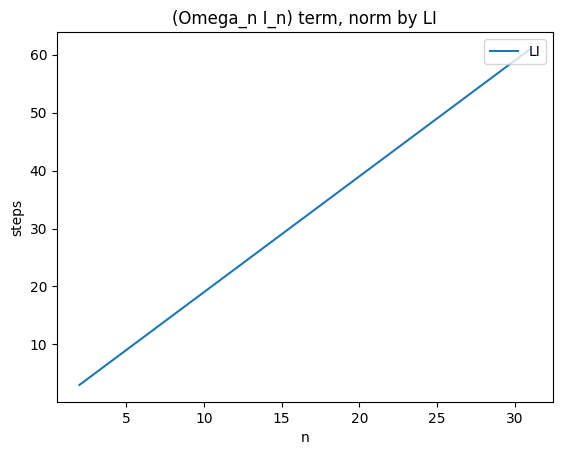

In [10]:
context = {
    "LI": (li_steps, "-"),
}

draw_mult_lines(comp_data=context, title="(Omega_n I_n) term, norm by LI", x_label="n", y_label="steps")

# OuterRandom

In [5]:
random_outer_steps_pow_2 = []
strategy = RandomOuterStrategy(prob_norm="pow_2")
count_tries = 20
for n, m in tqdm(nm_pairs):
    total_steps = 0
    term = omega_multi_i_term(n, m)
    for _ in range(count_tries):
        _, norm_steps = term.normalize(strategy, is_limited=False)
        total_steps += norm_steps
    random_outer_steps_pow_2.append(total_steps / count_tries)

100%|██████████| 30/30 [1:23:59<00:00, 167.98s/it]


In [6]:
print(random_outer_steps_pow_2)

[3.85, 8.9, 15.85, 24.6, 35.75, 48.7, 64.0, 81.0, 100.0, 121.0, 144.0, 169.0, 196.0, 225.0, 256.0, 289.0, 324.0, 361.0, 400.0, 441.0, 484.0, 529.0, 576.0, 625.0, 676.0, 729.0, 784.0, 841.0, 900.0, 961.0]


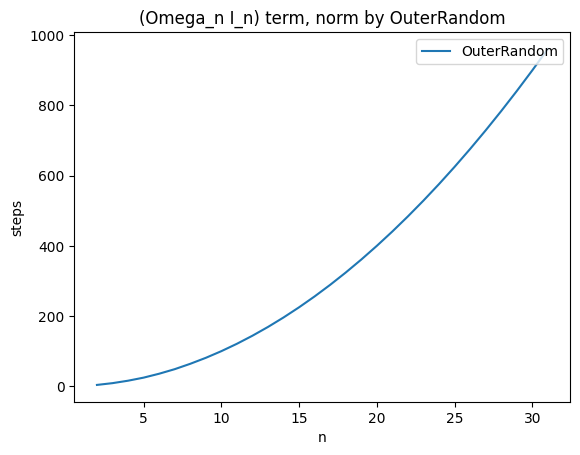

In [7]:
context = {
    "OuterRandom": (random_outer_steps_pow_2, "-"),
}

draw_mult_lines(comp_data=context, title="(Omega_n I_n) term, norm by OuterRandom", x_label="n", y_label="steps")

In [8]:
random_outer_steps_pow_1 = []
strategy = RandomOuterStrategy(prob_norm="pow_1")
count_tries = 20
for n, m in tqdm(nm_pairs):
    total_steps = 0
    term = omega_multi_i_term(n, m)
    for _ in range(count_tries):
        _, norm_steps = term.normalize(strategy, is_limited=False)
        total_steps += norm_steps
    random_outer_steps_pow_1.append(total_steps / count_tries)

100%|██████████| 30/30 [1:21:26<00:00, 162.88s/it]


In [9]:
print(random_outer_steps_pow_1)

[3.65, 8.0, 15.1, 24.2, 34.75, 47.8, 63.65, 80.6, 99.1, 119.5, 142.35, 168.4, 194.05, 225.0, 255.25, 288.2, 323.15, 360.1, 398.1, 439.0, 480.85, 529.0, 576.0, 622.6, 676.0, 729.0, 784.0, 841.0, 897.1, 958.0]


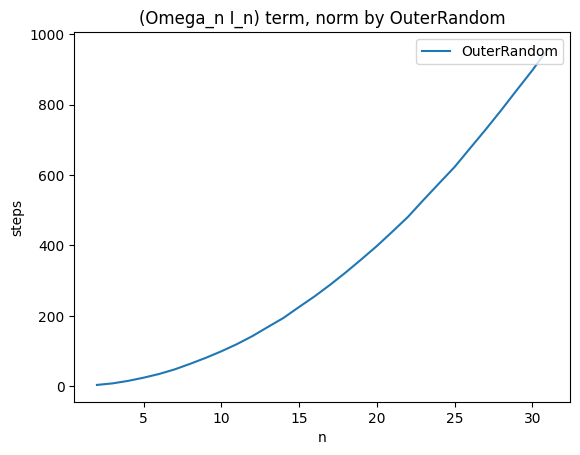

In [10]:
context = {
    "OuterRandom": (random_outer_steps_pow_1, "-"),
}

draw_mult_lines(comp_data=context, title="(Omega_n I_n) term, norm by OuterRandom", x_label="n", y_label="steps")

### InnerRandom

In [11]:
random_inner_steps_pow_2 = []
strategy = RandomInnerStrategy(prob_norm="pow_2")
count_tries = 20
for n, m in tqdm(nm_pairs):
    total_steps = 0
    term = omega_multi_i_term(n, m)
    for _ in range(count_tries):
        _, norm_steps = term.normalize(strategy, is_limited=False)
        total_steps += norm_steps
    random_inner_steps_pow_2.append(total_steps / count_tries)

100%|██████████| 30/30 [01:46<00:00,  3.55s/it]


In [12]:
print(random_inner_steps_pow_2)

[3.1, 6.0, 8.05, 11.2, 13.75, 20.2, 23.05, 24.2, 29.8, 35.5, 42.25, 38.2, 41.3, 51.4, 49.0, 70.6, 75.8, 66.7, 89.35, 81.0, 106.0, 92.3, 93.0, 110.2, 92.25, 128.4, 104.95, 125.6, 98.15, 100.0]


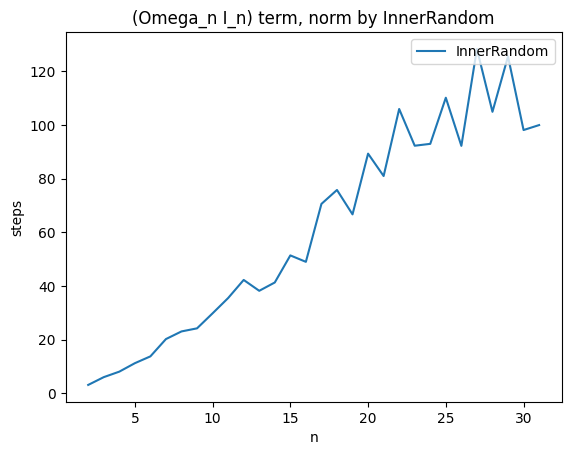

In [13]:
context = {
    "InnerRandom": (random_inner_steps_pow_2, "-"),
}

draw_mult_lines(comp_data=context, title="(Omega_n I_n) term, norm by InnerRandom", x_label="n", y_label="steps")

In [14]:
random_inner_steps_pow_1 = []
strategy = RandomInnerStrategy(prob_norm="pow_1")
count_tries = 20
for n, m in tqdm(nm_pairs):
    total_steps = 0
    term = omega_multi_i_term(n, m)
    for _ in range(count_tries):
        _, norm_steps = term.normalize(strategy, is_limited=False)
        total_steps += norm_steps
    random_inner_steps_pow_1.append(total_steps / count_tries)

100%|██████████| 30/30 [22:18<00:00, 44.61s/it] 


In [15]:
print(random_inner_steps_pow_1)

[3.45, 6.3, 10.9, 16.4, 21.75, 25.0, 38.45, 43.4, 50.95, 70.5, 80.2, 80.8, 127.1, 112.3, 148.75, 172.2, 204.15, 208.0, 248.95, 318.0, 288.7, 335.4, 328.75, 321.4, 357.25, 258.4, 373.6, 470.0, 454.85, 506.5]


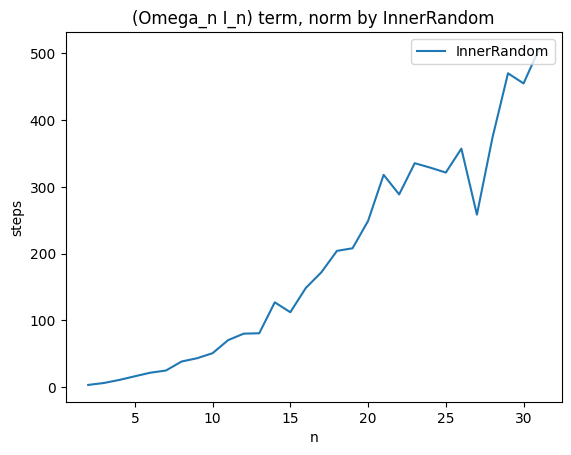

In [16]:
context = {
    "InnerRandom": (random_inner_steps_pow_1, "-"),
}

draw_mult_lines(comp_data=context, title="(Omega_n I_n) term, norm by InnerRandom", x_label="n", y_label="steps")

# DRAWING GRAPHICS FOR AN ARTICLE

In [ ]:
lo_steps = [4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289, 324, 361, 400, 441, 484, 529, 576,
            625, 676, 729, 784, 841, 900, 961]
li_steps = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57,
            59, 61]
or_steps_pow_2 = [3.85, 8.9, 15.85, 24.6, 35.75, 48.7, 64.0, 81.0, 100.0, 121.0, 144.0, 169.0, 196.0, 225.0, 256.0,
                  289.0, 324.0, 361.0, 400.0, 441.0, 484.0, 529.0, 576.0, 625.0, 676.0, 729.0, 784.0, 841.0, 900.0,
                  961.0]
or_steps_pow_1 = [3.65, 8.0, 15.1, 24.2, 34.75, 47.8, 63.65, 80.6, 99.1, 119.5, 142.35, 168.4, 194.05, 225.0, 255.25,
                  288.2, 323.15, 360.1, 398.1, 439.0, 480.85, 529.0, 576.0, 622.6, 676.0, 729.0, 784.0, 841.0, 897.1,
                  958.0]
ir_steps_pow_2 = [3.1, 6.0, 8.05, 11.2, 13.75, 20.2, 23.05, 24.2, 29.8, 35.5, 42.25, 38.2, 41.3, 51.4, 49.0, 70.6, 75.8,
                  66.7, 89.35, 81.0, 106.0, 92.3, 93.0, 110.2, 92.25, 128.4, 104.95, 125.6, 98.15, 100.0]
ir_steps_pow_1 = [3.45, 6.3, 10.9, 16.4, 21.75, 25.0, 38.45, 43.4, 50.95, 70.5, 80.2, 80.8, 127.1, 112.3, 148.75, 172.2,
                  204.15, 208.0, 248.95, 318.0, 288.7, 335.4, 328.75, 321.4, 357.25, 258.4, 373.6, 470.0, 454.85, 506.5]